# 1. Load Data

In [168]:
import pandas as pd
import os

print(os.getcwd())
df = pd.read_csv("D:/POSTECH/대외활동/2021 제1회 데이터사이언스경진대회/data/trainSet.csv", index_col=0)
df_GAS_MONTH = df.iloc[48:,31:67]
df_CND_MONTH = df.iloc[48:,68:104]
df_HRS_MONTH = df.iloc[48:,104:140]
df.head()

D:\POSTECH\대외활동\2021 제1회 데이터사이언스경진대회\2021_SHALE_GAS_TRADING\preprocessing


,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,...,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
No,,,,,,,,,,,,,,,,,,,,,
354,134,3323,3298,15384,10746,0.583087,0.520701,0.202393,2015/05/21,2015/05/01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,142,3073,3054,20167,10440,1.059932,0.402927,0.242269,2014/10/16,2014/10/01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,146,3318,3291,18832,10745,1.913723,0.351151,0.274381,2019/03/14,2019/03/01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,148,3220,3188,20243,10884,0.185481,0.231014,0.305237,2019/03/19,2019/02/01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,149,3220,3189,19085,10916,0.432910,0.214301,0.306795,2019/03/19,2019/02/01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df_GAS_MONTH.head()

,GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,GAS_MONTH_10,...,GAS_MONTH_27,GAS_MONTH_28,GAS_MONTH_29,GAS_MONTH_30,GAS_MONTH_31,GAS_MONTH_32,GAS_MONTH_33,GAS_MONTH_34,GAS_MONTH_35,GAS_MONTH_36
No,,,,,,,,,,,,,,,,,,,,,
1,129303.0,162132.0,126960.0,118344.0,123348.0,110403.0,97038.0,82473.0,81354.0,80334.0,...,41910.0,39252.0,39261.0,46926.0,41079.0,48309.0,46437.0,36555.0,35895.0,35400.0
3,1482.0,151515.0,235626.0,136260.0,126114.0,123303.0,114399.0,98718.0,82953.0,82551.0,...,33219.0,33723.0,32271.0,31977.0,36258.0,25923.0,24729.0,35724.0,26070.0,23388.0
5,204702.0,237939.0,140163.0,107802.0,106329.0,60282.0,70878.0,72888.0,69816.0,65454.0,...,21618.0,22710.0,25584.0,27090.0,25713.0,32997.0,24762.0,26496.0,25263.0,25278.0
7,122931.0,178464.0,125649.0,92613.0,93096.0,99567.0,54078.0,45219.0,63117.0,55056.0,...,25638.0,23046.0,18423.0,30969.0,25932.0,24387.0,27138.0,24939.0,23334.0,21852.0
9,176409.0,211509.0,150930.0,95274.0,93339.0,88740.0,75798.0,98001.0,101079.0,89520.0,...,25395.0,28158.0,27123.0,28479.0,24810.0,23709.0,28008.0,20445.0,19320.0,19827.0


# 2. Make Series dataframe

## 2.1. Make Series data

In [114]:
print("min of First Prod YYYY/MM: ", min(df["First Prod YYYY/MM"]))
print("max of First Prod YYYY/MM: ", max(df["First Prod YYYY/MM"]))
dates = pd.date_range(min(df_dropnan["First Prod YYYY/MM"]),max(df_dropnan["First Prod YYYY/MM"]),freq='MS')
series_ts = pd.Series(dates, index=range(len(dates)))
df_series_GAS = pd.DataFrame(series_ts, index=series_ts, columns=['date_index'])
for i in df_dropnan.index:
    df_series_GAS[str(i)] = -1
df_series_GAS = df_series_GAS.drop(columns=['date_index'])
df_series_GAS.head()

min of First Prod YYYY/MM:  2011/07/01
max of First Prod YYYY/MM:  2020/04/01


,1,3,5,7,9,11,19,21,22,23,...,690,692,694,696,706,708,716,718,720,722
2011-07-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-08-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-09-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-10-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-11-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [122]:
series_ts.head()
int(series_ts.index[series_ts == "2011-09-01"].tolist()[0])
df_series_GAS["1"][1]

-1

## 2.2. Fill data to dataframe

In [175]:
for no in df_dropnan.index:
    try:
        _tindex = int(series_ts.index[series_ts == pd.to_datetime(df["First Prod YYYY/MM"][no]).strftime('%Y-%m-%d')].tolist()[0])
    except:
        print("No {0} has Wrong First Prod: {1} is Not a first day of month.".format(no,df_dropnan["First Prod YYYY/MM"][no]))
        continue
    for j in range(36):
        if (_tindex+j > len(df_series_GAS)-1):
            continue
        df_series_GAS[str(no)][_tindex+j] = df_dropnan["GAS_MONTH_{0}".format(j+1)][no]

No 308 has Wrong First Prod: 2017/10/31 is Not a first day of month.
No 440 has Wrong First Prod: 2015/04/30 is Not a first day of month.
No 448 has Wrong First Prod: 2013/09/27 is Not a first day of month.


,1,3,5,7,9,11,19,21,22,23,...,690,692,694,696,706,708,716,718,720,722
2011-07-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-08-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-09-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-10-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2011-11-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-01,162132,235626,237939,178464,211509,174648,71115,-1,-1,24660,...,45039,12624,50787,-1,33567,36843,21570,10137,16056,16449
2018-04-01,126960,136260,140163,125649,150930,169272,59103,-1,-1,0,...,39411,13770,46869,-1,30360,33798,19785,-1,-1,-1
2018-05-01,118344,126114,107802,92613,95274,134325,56115,-1,-1,20478,...,37488,19416,43107,-1,33471,32988,20931,-1,-1,-1
2018-06-01,123348,123303,106329,93096,93339,138120,53031,-1,-1,16296,...,31092,16170,40047,-1,30438,29613,20328,-1,-1,-1


## 2.3. Normalize Data

In [176]:
# column-wise normalize
normalization_df = (df_series_GAS - df_series_GAS.mean())/df_series_GAS.std()
normalization_df.head()
#normalization_df.to_csv("norm_series.csv")

,1,3,5,7,9,11,19,21,22,23,...,690,692,694,696,706,708,716,718,720,722
2011-07-01,-0.271623,-0.263799,-0.250562,-0.265105,-0.257884,-0.271018,-0.344031,-0.53926,-0.607149,-0.446883,...,-0.314201,-0.58286,-0.356066,-0.557753,-0.352671,-0.356167,-0.576572,-0.49362,-0.597579,-0.590464
2011-08-01,-0.271623,-0.263799,-0.250562,-0.265105,-0.257884,-0.271018,-0.344031,-0.53926,-0.607149,-0.446883,...,-0.314201,-0.58286,-0.356066,-0.557753,-0.352671,-0.356167,-0.576572,-0.49362,-0.597579,-0.590464
2011-09-01,-0.271623,-0.263799,-0.250562,-0.265105,-0.257884,-0.271018,-0.344031,-0.53926,-0.607149,-0.446883,...,-0.314201,-0.58286,-0.356066,-0.557753,-0.352671,-0.356167,-0.576572,-0.49362,-0.597579,-0.590464
2011-10-01,-0.271623,-0.263799,-0.250562,-0.265105,-0.257884,-0.271018,-0.344031,-0.53926,-0.607149,-0.446883,...,-0.314201,-0.58286,-0.356066,-0.557753,-0.352671,-0.356167,-0.576572,-0.49362,-0.597579,-0.590464
2011-11-01,-0.271623,-0.263799,-0.250562,-0.265105,-0.257884,-0.271018,-0.344031,-0.53926,-0.607149,-0.446883,...,-0.314201,-0.58286,-0.356066,-0.557753,-0.352671,-0.356167,-0.576572,-0.49362,-0.597579,-0.590464


In [182]:
# row-wise normalize
normalization_GAS = df_GAS_MONTH.div(df_GAS_MONTH.mean(axis=1), axis=0)
normalization_GAS.head()
normalization_GAS.to_csv("norm_minmax_GAS.csv")

<AxesSubplot:>

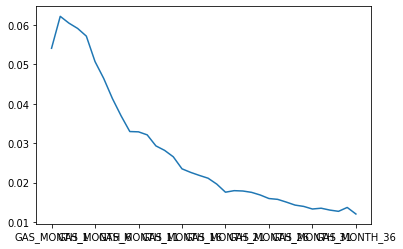

In [181]:
normalization_GAS.mean().plot.line()